In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from matplotlib.backends.backend_pdf import PdfPages
import calendar

## dv_lees

In [2]:
# the URL is just a long string
site_num = '09380000'

dv_url = 'http://waterservices.usgs.gov/nwis/dv/?format=rdb'
dv_url += '&sites={0}'.format(site_num)
#dv_url += '&startDT=2010-01-01'
dv_url += '&startDT=1919-01-01'
#dv_url += '&endDT=2018-01-17'
dv_url += '&parameterCd=00060'
print(dv_url)


http://waterservices.usgs.gov/nwis/dv/?format=rdb&sites=09380000&startDT=1919-01-01&parameterCd=00060


## iv_lees

In [3]:
iv_url = dv_url.replace('dv','iv')

In [4]:
iv_url

'http://waterservices.usgs.gov/nwis/iv/?format=rdb&sites=09380000&startDT=1919-01-01&parameterCd=00060'

## monthly lake mead
https://www.usbr.gov/lc/region/g4000/hourly/mead-elv.html

In [5]:
mon_mead = pd.read_csv('mead.dat', delim_whitespace=' ', na_values=-999)
mon_mead = mon_mead.melt(id_vars='Year',value_vars=mon_mead.columns[1:], var_name='Month')
mon_mead['date'] = [f'{j}-{i}' for i,j in zip(mon_mead.Year, mon_mead.Month)]
mon_mead['datetime'] = [pd.to_datetime(i) for i in mon_mead.date]
mon_mead.rename(columns={'value':'Elev'}, inplace=True)

In [6]:
mon_mead.set_index('datetime',drop=True, inplace=True)
mon_mead=mon_mead.Elev.to_frame().dropna()

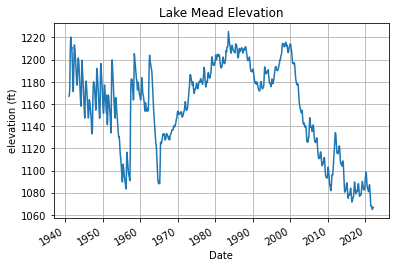

In [7]:
mon_mead.loc[mon_mead.index.year>1940].Elev.plot()
plt.title('Lake Mead Elevation')
plt.ylabel('elevation (ft)')
plt.xlabel('Date')
plt.grid('on')

In [8]:
read_orig=False
if read_orig:
    dv_lees = pd.read_csv(dv_url, comment='#', header=[0,1], sep='\t')
    iv_lees = pd.read_csv(iv_url, comment='#', header=[0,1], sep='\t')
    for j in [iv_lees, dv_lees]:
        j.columns =  [i[0] for i in j.columns]
        j.datetime = pd.to_datetime(j.datetime)
        j.set_index('datetime',drop=True,inplace=True) 
    iv_lees = iv_lees['6128_00060'].to_frame() # reducing to one column makes this a pandas series, but
                                                    # to add columns later, we want it to stay as a DataFrame
    iv_lees.columns=['Q']
    iv_lees.head()
    iv_lees['year'] = [i.year for i in iv_lees.index]
    iv_lees['month'] = [i.month for i in iv_lees.index]
    iv_lees['day'] = [i.day for i in iv_lees.index]
    iv_lees['hour'] = [i.hour for i in iv_lees.index]
    dv_lees = dv_lees['236239_00060_00003'].to_frame() # reducing to one column makes this a pandas series, but
                                                    # to add columns later, we want it to stay as a DataFrame
    dv_lees.columns=['Q']
    dv_lees.head()
    dv_lees['year'] = [int(i.year) for i in dv_lees.index]
    dv_lees['month'] = [int(i.month) for i in dv_lees.index]
    dv_lees['day'] = [int(i.day) for i in dv_lees.index]
    #dv_lees['month'] = [calendar.month_abbr[i] for i in dv_lees.month]
    
    dv_lees.to_csv('dv_lees.csv')
    iv_lees.to_csv('iv_lees.csv')
else:
    dv_lees = pd.read_csv('dv_lees.csv', index_col=0)
    iv_lees = pd.read_csv('iv_lees.csv', index_col=0)
    dv_lees.index = pd.to_datetime(dv_lees.index) 
    iv_lees.index = pd.to_datetime(iv_lees.index) 
   

In [9]:
dv_lees

,Q,year,month,day
datetime,,,,
1921-10-01,7120,1921,10,1
1921-10-02,11800,1921,10,2
1921-10-03,7830,1921,10,3
1921-10-04,7470,1921,10,4
1921-10-05,6780,1921,10,5
...,...,...,...,...
2022-03-15,10300,2022,3,15
2022-03-16,10100,2022,3,16
2022-03-17,10200,2022,3,17


In [10]:
dv_lees_orig = dv_lees.copy()
dv_lees = dv_lees_orig.loc[dv_lees.index.year>1920].copy()

In [11]:
dg = dv_lees.groupby(by='month')

<AxesSubplot:>

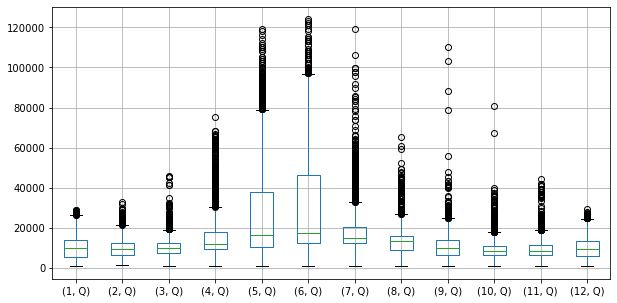

In [12]:
dg.boxplot(column='Q', subplots=False, figsize=(10,5))

In [13]:
dv_lees

,Q,year,month,day
datetime,,,,
1921-10-01,7120,1921,10,1
1921-10-02,11800,1921,10,2
1921-10-03,7830,1921,10,3
1921-10-04,7470,1921,10,4
1921-10-05,6780,1921,10,5
...,...,...,...,...
2022-03-15,10300,2022,3,15
2022-03-16,10100,2022,3,16
2022-03-17,10200,2022,3,17


# let's set up some time columns to aggregate on

In [14]:
iv_lees_trip = iv_lees.loc[(iv_lees.index>pd.to_datetime('2022-01-25')) & (iv_lees.index<pd.to_datetime('2022-02-24'))]

Text(0, 0.5, 'Flow at Lees Ferry (cfs)')

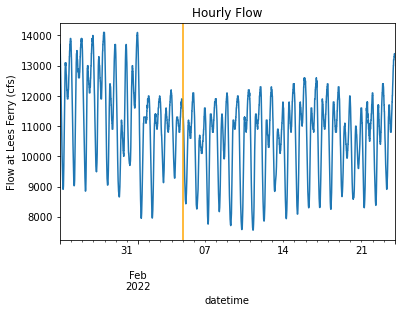

In [15]:
ax = iv_lees_trip.Q.plot()
plt.title('Hourly Flow')
plt.axvline(pd.to_datetime('2-5-2022'), color='orange')
plt.ylabel('Flow at Lees Ferry (cfs)')

In [16]:
iv_summ = iv_lees.groupby(['year', 'month'])['Q'].mean().to_frame()

In [17]:
trip_jan_q = iv_summ.loc[(2022,1)]
trip_feb_q = iv_summ.loc[(2022,2)]

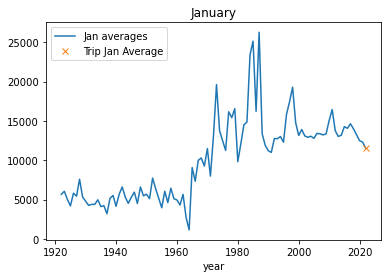

In [18]:
ax = dv_lees.loc[dv_lees.month==1].groupby('year').agg('mean')['Q'].plot(label='Jan averages')
ax.plot([2022],[trip_jan_q], 'x', label='Trip Jan Average')
plt.title('January')
plt.legend()

In [19]:
trip_jan_q

Q    11537.903226
Name: (2022, 1), dtype: float64

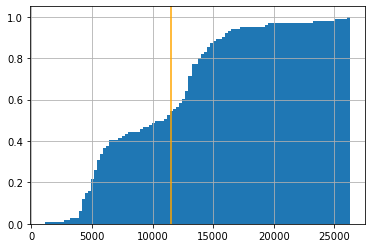

In [20]:
dv_lees.loc[dv_lees.month==1].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_jan_q.Q, color='orange')

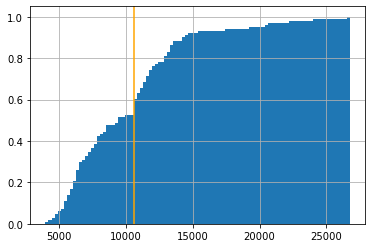

In [21]:
dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].hist(cumulative=True,
                                                                    density=1,
                                                                    bins=100,
                                                                    label='Jan averages')
plt.axvline(trip_feb_q.Q, color='orange')

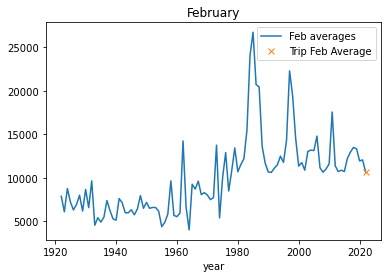

In [22]:
ax = dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].plot(label='Feb averages')
ax.plot([2022],[trip_feb_q], 'x', label='Trip Feb Average')
plt.title('February')
plt.legend()

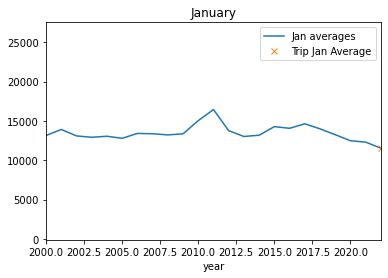

In [23]:
ax = dv_lees.loc[dv_lees.month==1].groupby('year').agg('mean')['Q'].plot(label='Jan averages')
ax.plot([2022],[trip_jan_q], 'x', label='Trip Jan Average')
plt.title('January')
plt.xlim([2000,2022])
plt.legend()

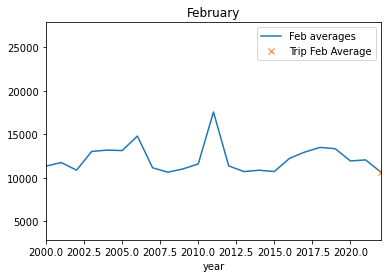

In [24]:
ax = dv_lees.loc[dv_lees.month==2].groupby('year').agg('mean')['Q'].plot(label='Feb averages')
ax.plot([2022],[trip_feb_q], 'x', label='Trip Feb Average')
plt.title('February')
plt.xlim([2000,2022])
plt.legend()

<AxesSubplot:xlabel='year,month'>

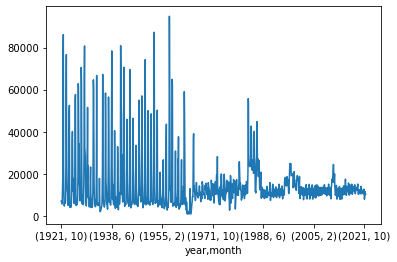

In [25]:
dv_lees.groupby(['year','month'])['Q'].mean().plot()